# Spectral Representation Method

This notebook ficusses on the generation of 1-Dimensional stochastic process with the Spectral Representation Method, using the StochasticProcess module of UQpy - see **section 3.2.1** in the accompanying paper "UQpy: A general purpose Python package and development environment for uncertainty quantification". 

The initial parameters of the simulation are first decided.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100  # Total time
nt = 256  # Num of Discretized Time
dt = T / nt

F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dw = F / nw
t_u = 2*np.pi/2/F
if dt>t_u:
    print('Error (aliasing)')

# Generation of Input Data(Stationary)
t = np.linspace(0, T - dt, nt)
w = np.linspace(0, F - dw, nw)

The power spectrum is assumed to be the following and the plot of the same is given below

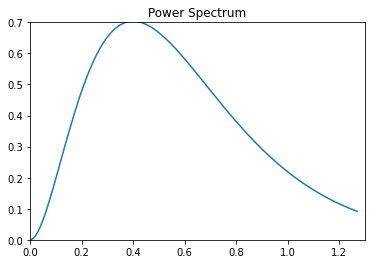

In [3]:
# Compute the power spectral density S(w) at various points frequencies w
S = 130 / 4 * w ** 2 * np.exp(-5 * w)

fig1 = plt.figure()
plt.plot(w, S)
plt.title('Power Spectrum')
plt.xlim(0, 1.3)
plt.ylim(0, 0.7)
plt.show()

Firstly, the Spectral Representation Method is imported from the StochasticProcess module of UQpy and the the input data is passed to the method which subsequently created the SRM object which contains the samples in the samples attribute of the object.

In [4]:
# Sample 1000 realizations of the stochastic process
nsamples = 1000

from UQpy.StochasticProcess import SRM
SRM_object = SRM(nsamples=nsamples, power_spectrum=S, time_interval=dt, frequency_interval=dw,
                 number_time_intervals=nt, number_frequency_intervals=nw, random_state=1234)
samples = SRM_object.samples

The samples generated from the SRM_object are plotted below

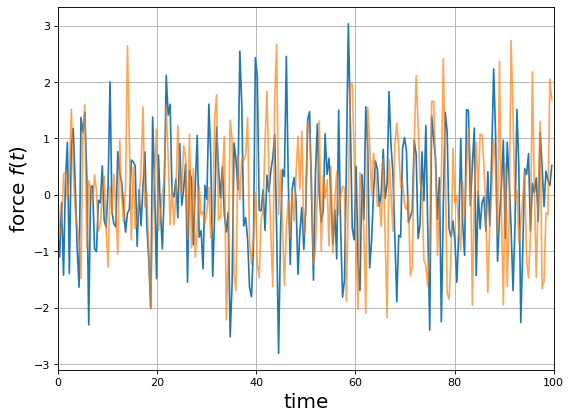

In [5]:
fig2 = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for j in range(2):
    plt.plot(t, SRM_object.samples[j, 0], alpha=1.-j*0.3)
plt.xlim(0, 100)
plt.xlabel('time', FontSize=18)
plt.ylabel('force $f(t)$', FontSize=18)
plt.grid('on', which='both')
#plt.savefig('time_history.pdf')
plt.show()